In [2]:
import numpy as np
import pandas as pd
from nilearn import masking, image
from scipy.stats import ttest_1samp, pearsonr,ttest_ind,ttest_rel
import statsmodels.api as sm

import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn-pastel')
sns.set_style('white')
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.rcParams.update({'font.size': 16})

<ipython-input-2-5b30190e18a4>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


In [244]:
# specify subjects
participants_tsv = r'/mnt/workdir/DCM/BIDS/participants.tsv'
participants_data = pd.read_csv(participants_tsv, sep='\t')
participants_data =  participants_data.query("(game1_fmri>=0.5)")
subjects_id = participants_data['Participant_ID'].to_list()

# set cmp template
distance_cmap = r'/mnt/data/DCM/result_backup/2023.5.14/Nilearn/game1/distance_spct/Setall/6fold/{}/zmap/{}_corrxdistance_zmap.nii.gz'
value_cmap = r'/mnt/data/DCM/result_backup/2023.5.14/Nilearn/game1/distance_spct/Setall/6fold/{}/zmap/valuexdistance_zmap.nii.gz'

# set subjects cmap path
subs_M2_distance = [distance_cmap.format(sub, 'M2') for sub in subjects_id]
subs_decision_distance = [distance_cmap.format(sub, 'decision') for sub in subjects_id]
subs_value = [value_cmap.format(sub) for sub in subjects_id]

# set roi
dmpfc = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/dmPFC/BN_dmPFC.nii.gz')
vmpfc = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/VMPFC/VMPFC_mask_MNI152NL.nii.gz')
# roi1 = image.load_img(r'/mnt/data/DCM/tmp/aparc/mask/lh.lateralorbitofrontal.nii.gz')
# roi2 = image.load_img(r'/mnt/data/DCM/tmp/aparc/mask/rh.lateralorbitofrontal.nii.gz')
# lofc = image.math_img('np.logical_or(img1,img2)', img1=roi1, img2=roi2)

# extract mean activity of ROI for each subjects
data = pd.DataFrame()
for effect in ['distance']:
    for roi_name in ['vmpfc','dmpfc']:
        for onset in ['M2','decision']:
            subs_cmap = eval(f'subs_{onset}_{effect}')
            roi = eval(roi_name)
            act = np.mean(masking.apply_mask(subs_cmap,roi), axis=1)
            data = data.append(pd.DataFrame({'sub':subjects_id,'act':act,'effect':effect,'ROI':roi_name,'onset':onset}))

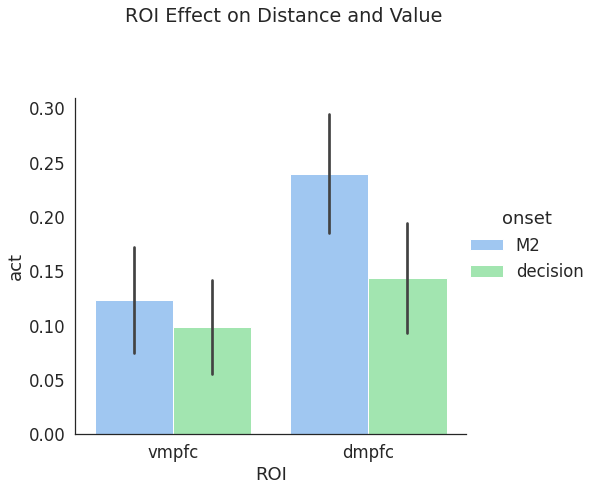

In [245]:
def p2sign(p):
    if  p<=0.001:
        sign='***'
    elif p<=0.01:
        sign='**'
    elif p<=0.05:
        sign='*'
    else:
        sign='n.s.'
    return sign

# create the bar plot using seaborn
g = sns.catplot(x="ROI", y="act", hue="onset",
                data=data, kind="bar", errorbar='se', height=7)
# set the title of the plot
plt.subplots_adjust(top=0.8)
plt.suptitle('ROI Effect on Distance and Value')

plt.show()

In [246]:
d1 = data.query("(ROI=='dmpfc') and (onset=='M2')")['act']
d2 = data.query("(ROI=='dmpfc') and (onset=='decision')")['act']
t, p = ttest_rel(d1,d2)
print(t,p)

1.2134224815713237 0.22638528067232044


In [249]:
d = data.query("(ROI=='vmpfc') and (onset=='M2')")['act']
t, p = ttest_1samp(d,0)
print(t,p)

2.5259809200858636 0.012304950967940178


In [229]:
# specify subjects
participants_tsv = r'/mnt/workdir/DCM/BIDS/participants.tsv'
participants_data = pd.read_csv(participants_tsv, sep='\t')
participants_data = participants_data.query("(game1_fmri>=0.5)")
subjects_id = participants_data['Participant_ID'].to_list()

# set cmp template
eucd_cmap = r'/mnt/workdir/DCM/BIDS/derivatives/Nilearn/game1/2distance_spct/Setall/6fold/{}/zmap/eudc_zmap.nii.gz'
manhd_cmap = r'/mnt/workdir/DCM/BIDS/derivatives/Nilearn/game1/2distance_spct/Setall/6fold/{}/zmap/manhd_zmap.nii.gz'
value_cmap = r'/mnt/workdir/DCM/BIDS/derivatives/Nilearn/game1/value_spct/Setall/6fold/{}/zmap/value_zmap.nii.gz'

# set subjects cmap path
subs_euclidean = [eucd_cmap.format(sub) for sub in subjects_id]
subs_manhattan = [manhd_cmap.format(sub) for sub in subjects_id]
subs_value = [value_cmap.format(sub) for sub in subjects_id]

# extract mean activity of ROI for each subjects
data = pd.DataFrame()
for effect in ['euclidean','manhattan','value']:
    for roi_name in ['vmpfc', 'dmpfc']:
        subs_cmap = eval(f'subs_{effect}')
        roi = eval(roi_name)
        act = np.mean(masking.apply_mask(subs_cmap, roi), axis=1)
        data = data.append(pd.DataFrame({'sub': subjects_id, 'act': act, 'effect': effect, 'ROI': roi_name}))

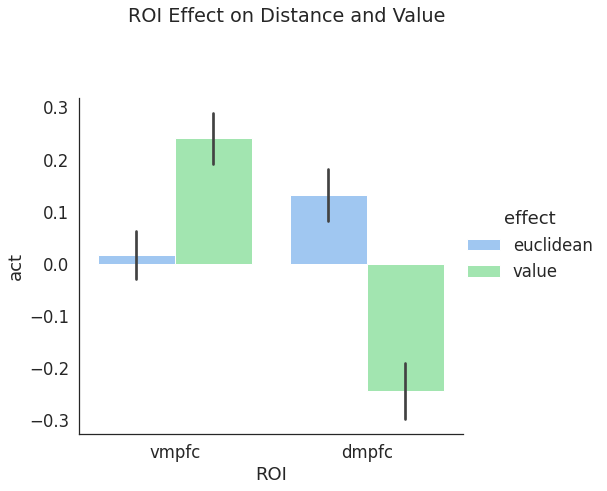

In [224]:
# Create the bar plot using seaborn
data = data[data['effect']!='manhattan']
sns.catplot(x="ROI", y="act", hue="effect",
            data=data, kind="bar",errorbar='se', height=7)

# Set the title of the plot
plt.subplots_adjust(top=0.8)
plt.suptitle('ROI Effect on Distance and Value')

# Show the plot
plt.show()

In [81]:
d1 = data.query("(ROI=='dmpfc') and (effect=='euclidean')")['act']
d2 = data.query("(ROI=='dmpfc') and (effect=='value')")['act']
t, p = ttest_rel(d1,d2)
print(t,p)

9.822058759163337 7.323672900065657e-19


In [213]:
d = data.query("(ROI=='vmpfc') and (effect=='value')")['act']
t, p = ttest_1samp(d,0,alternative='greater')
print(t,p)

3.9579262437103027 5.233967281163318e-05


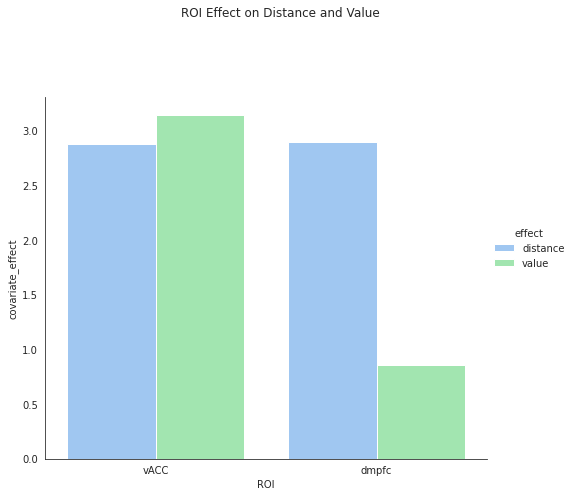

In [17]:
distance_zmap = r'/mnt/data/DCM/result_backup/2023.5.14/Nilearn/game1/distance_spct/Setall/6fold/group_203/acc/M2_corrxdistance_acc_zmap.nii.gz'

value_zmap = r'/mnt/data/DCM/result_backup/2023.5.14/Nilearn/game1/value_spct/Setall/6fold/group/acc/value_acc_zmap.nii.gz'

# set roi
dmpfc = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/VMPFC/BN_amPFC.nii.gz')
vACC = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/VMPFC/BN_vACC.nii.gz')

data = pd.DataFrame()
for effect in ['distance','value']:
    for roi_name in ['vACC','dmpfc']:
        covariate_map = eval(f'{effect}_zmap')
        roi = eval(roi_name)
        covariate_effect = masking.apply_mask(covariate_map,roi)
        data = data.append(pd.DataFrame({'covariate_effect':covariate_effect,'ROI':roi_name,'effect':effect}))

# create the bar plot using seaborn
sns.catplot(x="ROI", y="covariate_effect", hue="effect",
                data=data, kind="bar",errorbar=None, height=7)
# set the title of the plot
plt.subplots_adjust(top=0.8)
plt.suptitle('ROI Effect on Distance and Value')

plt.show()